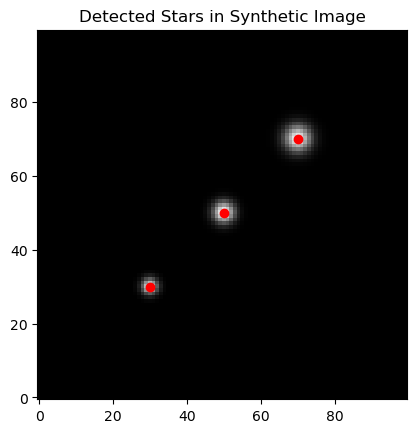

In [1]:
import numpy as np
from PIL import Image
from photutils.detection import DAOStarFinder
from astropy.stats import mad_std
import matplotlib.pyplot as plt

from photutils.datasets import make_gaussian_sources_image
from astropy.table import Table

from sklearn.preprocessing import MinMaxScaler

from photutils.datasets import make_gaussian_sources_image
from astropy.table import Table

# Create synthetic stars
shape = (100, 100)  # Image size
sources_data = Table()
sources_data['x_mean'] = [30, 50, 70]  # X positions
sources_data['y_mean'] = [30, 50, 70]  # Y positions
sources_data['flux'] = [500, 1000, 1500]  # Star brightness
sources_data['x_stddev'] = [1.5, 2.0, 2.5]  # Star size
sources_data['y_stddev'] = sources_data['x_stddev']
sources_data['theta'] = [0, 0, 0]

# Generate synthetic image
synthetic_image = make_gaussian_sources_image(shape, sources_data)

# Run detection
sigma = mad_std(synthetic_image)
daofind = DAOStarFinder(fwhm=2.0, threshold=3.0 * sigma)
synthetic_sources = daofind(synthetic_image)

# Verify results
plt.imshow(synthetic_image, cmap='gray', origin='lower')
if synthetic_sources is not None:
    for star in synthetic_sources:
        plt.plot(star['xcentroid'], star['ycentroid'], 'ro')
plt.title('Detected Stars in Synthetic Image')
plt.show()